In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("hangboard_data.csv")
data.tail(36)

,day,date,set,arm,position,duration(sec),size(mm)
72,5,2023-02-05,1,1,1,1.60,22
73,5,2023-02-05,1,2,1,5.22,22
74,5,2023-02-05,2,1,1,2.76,22
75,5,2023-02-05,2,2,1,5.91,22
76,5,2023-02-05,3,1,1,2.47,22
77,5,2023-02-05,3,2,1,4.49,22
78,5,2023-02-05,1,1,2,5.25,22
79,5,2023-01-05,1,2,2,6.84,22
80,5,2023-01-05,2,1,2,3.56,22
81,5,2023-01-05,2,2,2,6.64,22


In [28]:
df = data.copy()
df.head()

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,1,1,1.30,22
1,1,2022-12-23,1,2,1,0.80,22
2,1,2022-12-23,2,1,1,1.70,22
3,1,2022-12-23,2,2,1,2.46,22
4,1,2022-12-23,3,1,1,2.02,22


# Comparing mean set duration to see which set I perform the best

<AxesSubplot: xlabel='set'>

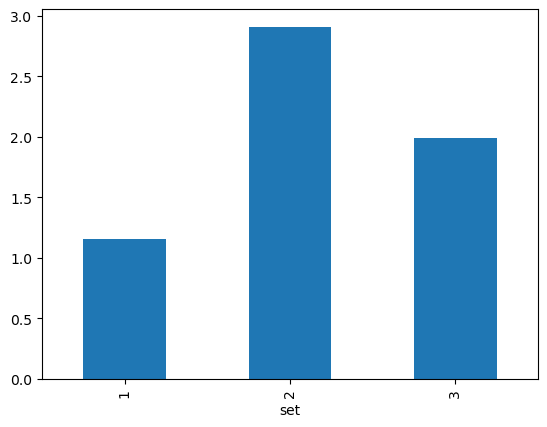

In [29]:
day_1 = df.loc[0:17];
day_1.groupby('set')['duration(sec)'].mean().plot(kind='bar')


<AxesSubplot: xlabel='set'>

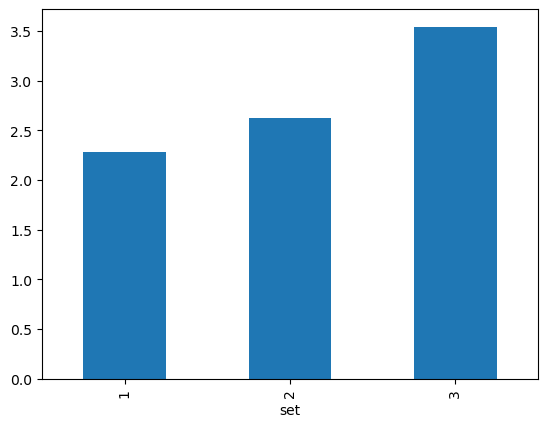

In [30]:
day_2 = df.loc[18:35];
day_2.groupby('set')['duration(sec)'].mean().plot(kind='bar')

<AxesSubplot: xlabel='set'>

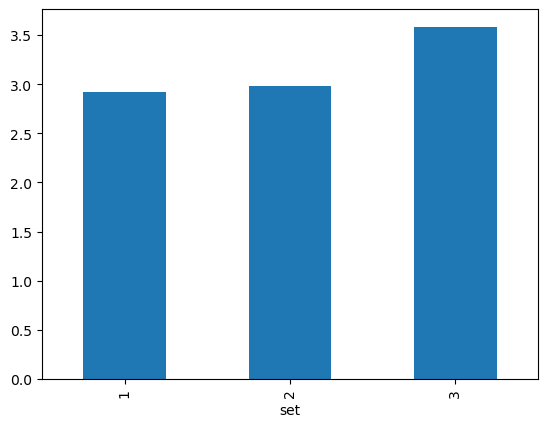

In [31]:
day_3 = df.loc[36:53];
day_3.groupby('set')['duration(sec)'].mean().plot(kind='bar')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            108 non-null    int64  
 1   date           108 non-null    object 
 2   set            108 non-null    int64  
 3   arm            108 non-null    int64  
 4   position       108 non-null    int64  
 5   duration(sec)  108 non-null    float64
 6   size(mm)       108 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 6.0+ KB


# Handling dtypes

In [33]:
def dtype(arg):
    data[arg] = data[arg].astype('string')
data['date'] = pd.to_datetime(data['date'])


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   day            108 non-null    int64         
 1   date           108 non-null    datetime64[ns]
 2   set            108 non-null    int64         
 3   arm            108 non-null    int64         
 4   position       108 non-null    int64         
 5   duration(sec)  108 non-null    float64       
 6   size(mm)       108 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 6.0 KB


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
day,108.0,3.500000,1.715787,1.0,2.0000,3.500,5.0000,6.00
set,108.0,2.000000,0.820303,1.0,1.0000,2.000,3.0000,3.00
arm,108.0,1.500000,0.502331,1.0,1.0000,1.500,2.0000,2.00
position,108.0,2.000000,0.820303,1.0,1.0000,2.000,3.0000,3.00
duration(sec),108.0,3.380741,1.767028,0.8,1.8925,3.065,4.3325,9.11
size(mm),108.0,22.000000,0.000000,22.0,22.0000,22.000,22.0000,22.00


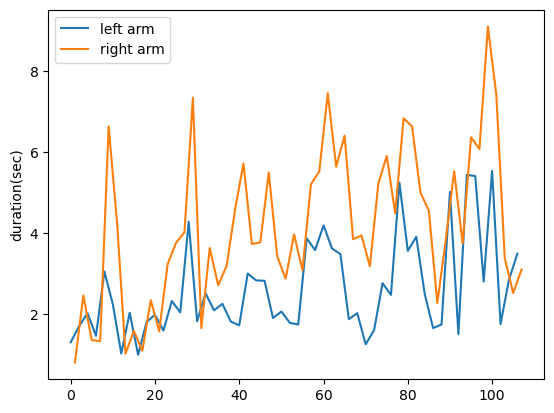

In [36]:
data.groupby('arm')['duration(sec)'].plot();
plt.ylabel('duration(sec)');
plt.legend(['left arm', 'right arm']);

In [37]:
groupby_day = data.groupby('day')
groupby_day.head()

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,1,1,1.30,22
1,1,2022-12-23,1,2,1,0.80,22
2,1,2022-12-23,2,1,1,1.70,22
3,1,2022-12-23,2,2,1,2.46,22
4,1,2022-12-23,3,1,1,2.02,22
18,2,2022-12-26,1,1,1,1.80,22
19,2,2022-12-26,1,2,1,2.34,22
20,2,2022-12-26,2,1,1,1.98,22
21,2,2022-12-26,2,2,1,1.57,22
22,2,2022-12-26,3,1,1,1.59,22


In [38]:
for day, data in groupby_day:
    print(day);
    print(groupby_day);

1
2
3
4
5
6


In [39]:
groupby_day.get_group(1)

,day,date,set,arm,position,duration(sec),size(mm)
0,1,2022-12-23,1,1,1,1.30,22
1,1,2022-12-23,1,2,1,0.80,22
2,1,2022-12-23,2,1,1,1.70,22
3,1,2022-12-23,2,2,1,2.46,22
4,1,2022-12-23,3,1,1,2.02,22
5,1,2022-12-23,3,2,1,1.35,22
6,1,2022-12-23,1,1,2,1.46,22
7,1,2022-12-23,1,2,2,1.33,22
8,1,2022-12-23,2,1,2,3.05,22
9,1,2022-12-23,2,2,2,6.64,22


# Aggregate

In [40]:
groupby_day.mean(numeric_only=True)

,set,arm,position,duration(sec),size(mm)
day,,,,,
1,2.0,1.5,2.0,2.018889,22.0
2,2.0,1.5,2.0,2.816111,22.0
3,2.0,1.5,2.0,3.162778,22.0
4,2.0,1.5,2.0,3.883889,22.0
5,2.0,1.5,2.0,3.899444,22.0
6,2.0,1.5,2.0,4.503333,22.0


In [41]:
data.groupby('position')['duration(sec)'].mean()

position
1    4.601667
2    6.060000
3    2.848333
Name: duration(sec), dtype: float64

# Comparing arm capacity

In [42]:
left_hang = data[data['arm']== 1]
left_hang['duration(sec)'].sum()

33.800000000000004

In [43]:
right_hang = data[data['arm']== 2]
right_hang['duration(sec)'].sum()

47.26

In [44]:
lh = left_hang.groupby('position')['duration(sec)'].mean()
left_hang_mean = pd.DataFrame(lh)
left_hang_mean

,duration(sec)
position,
1,3.986667
2,4.583333
3,2.696667


In [45]:
rh = right_hang.groupby('position')['duration(sec)'].mean()
right_hang_mean = pd.DataFrame(rh) 
right_hang_mean

,duration(sec)
position,
1,5.216667
2,7.536667
3,3.000000


In [46]:
frames = [left_hang_mean, right_hang_mean]
mean_comparison = pd.concat(frames)
mean_comparison

,duration(sec)
position,
1,3.986667
2,4.583333
3,2.696667
1,5.216667
2,7.536667
3,3.000000
